### Assignment 1
Myles Molnar

TheMyles

7243135558

9/20/2024

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error, f1_score, confusion_matrix
from scipy.spatial.distance import mahalanobis

In [126]:
def df_func():
    labels = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis", "diagnosis"]
    df = pd.read_csv('../vertebral_column_data/column_2C.dat', sep = " ", names = labels)

    df['label'] = 0
    df.loc[df['diagnosis'] == 'AB', 'label'] = 1
    del df['diagnosis']

    return df

df = df_func()
df


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


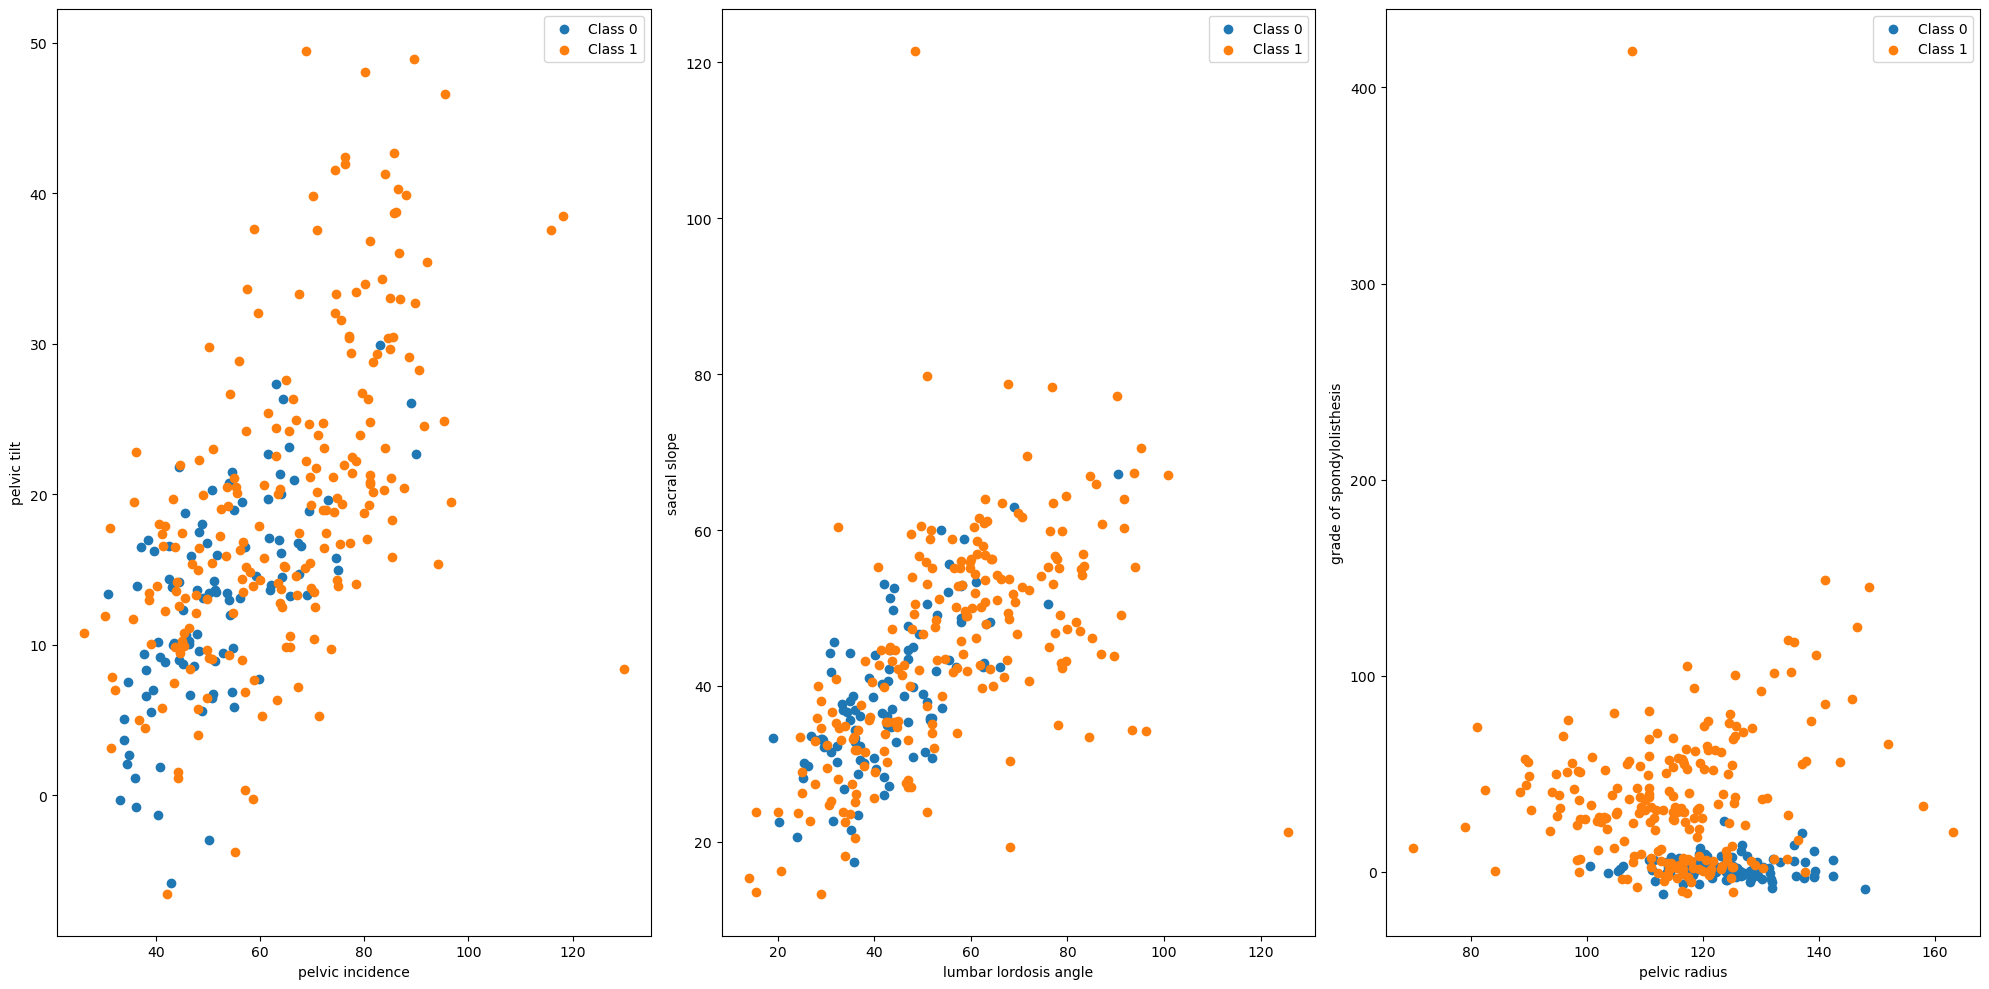

In [127]:
fig, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

for i in range(0, 6, 2):
    ax[int(i/2)].scatter(df_0.iloc[:, i], df_0.iloc[:, i+1])
    ax[int(i/2)].scatter(df_1.iloc[:, i], df_1.iloc[:, i+1])
    ax[int(i/2)].set_xlabel(df.columns[i])
    ax[int(i/2)].set_ylabel(df.columns[i+1])
    ax[int(i/2)].legend(['Class 0', 'Class 1'])


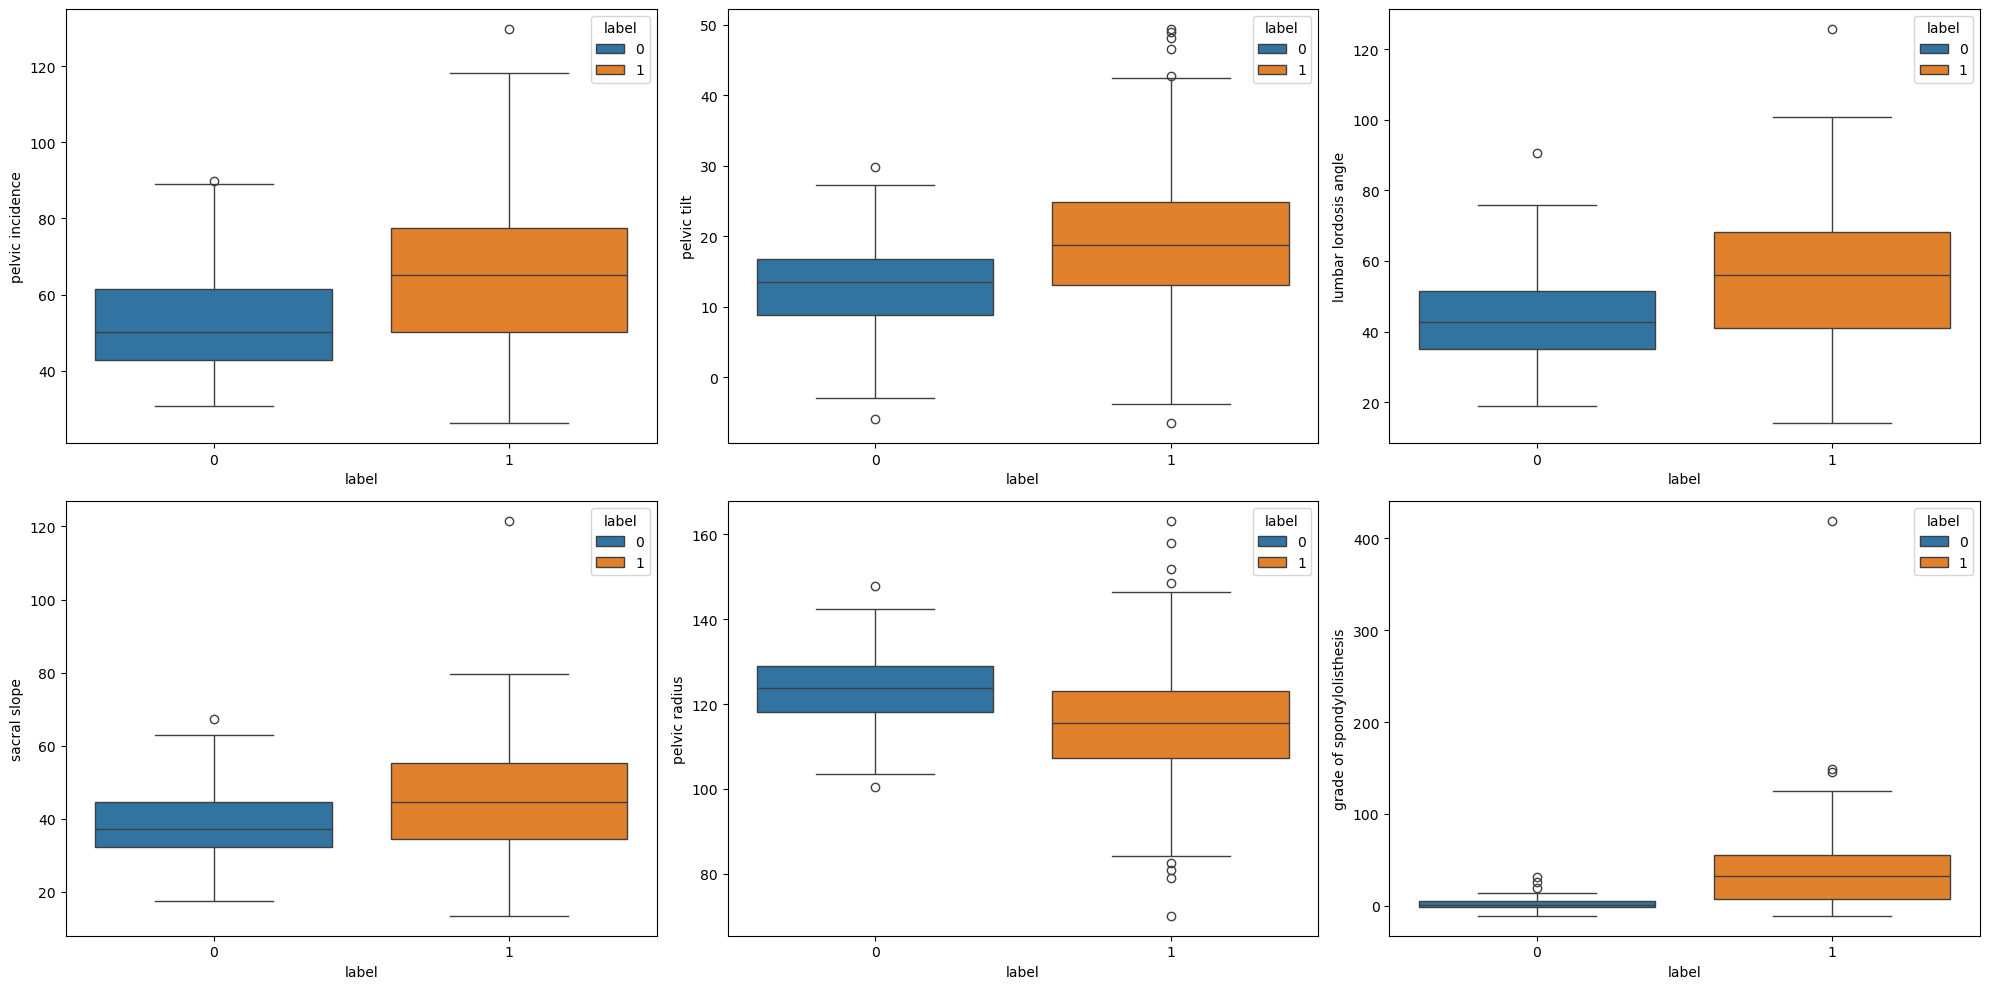

In [128]:
fig, axes = plt.subplots(2, 3)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
for i in range(2):
    for j in range(3):
        sn.boxplot(data=df, x='label', y=df.columns[i*3+j], hue='label', ax=axes[i, j])

In [129]:
df_train_a = df[df['label'] == 0].iloc[0:70]
df_train_b = df[df['label'] == 1].iloc[0:140]
df_train = pd.concat([df_train_a, df_train_b])
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

c = df[df['label'] == 0].iloc[70:]
d = df[df['label'] == 1].iloc[140:]
df_test = pd.concat([c, d])
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

In [130]:
# model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mean_squared_error(y_train, model.predict(X_train))
# mean_squared_error(y_test, y_pred)

In [131]:
train_errors = []
test_errors = []
idx = range(1, 209, 3)

for i in range(1, 209, 3):
    model = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_err = mean_squared_error(y_train, model.predict(X_train))
    test_err = mean_squared_error(y_test, y_pred)
    train_errors.append(train_err)
    test_errors.append(test_err)


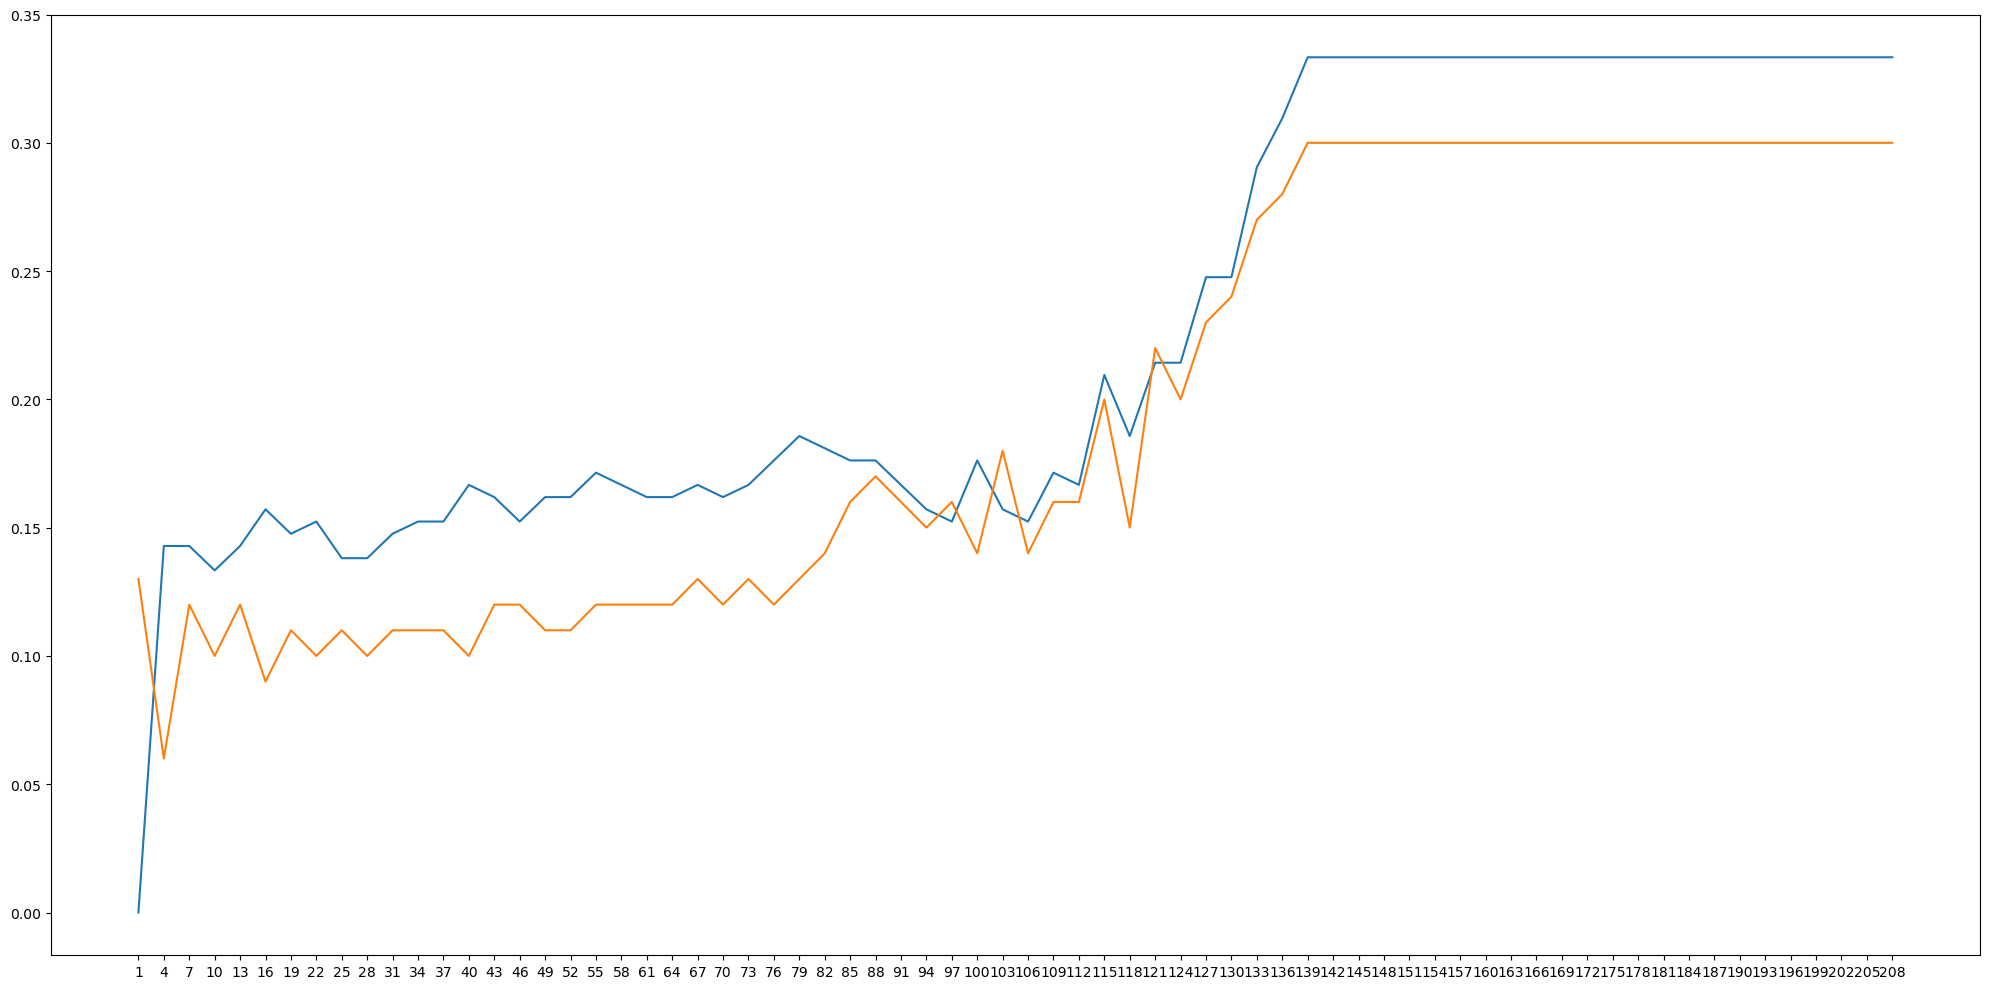

In [132]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot(idx, train_errors)
plt.plot(idx, test_errors)
_ = plt.xticks(idx)

In [133]:
best_k = 4
euc_model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
euc_model.fit(X_train, y_train)
y_pred = euc_model.predict(X_test)

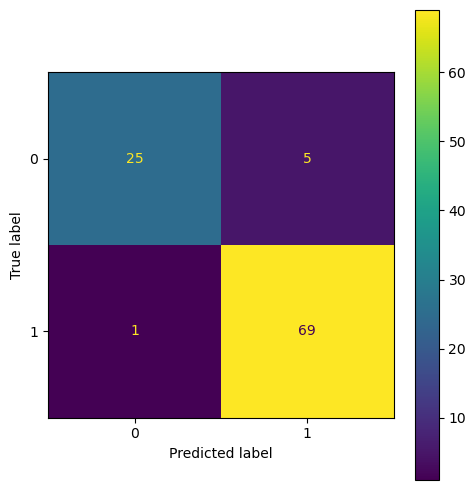

In [134]:
plt.rcParams["figure.figsize"] = [5, 5]
conf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
conf.plot()

In [135]:
true_pos_rate = 69/(69+1)
true_neg_rate = 25/(25+5)
f1 = f1_score(y_test, y_pred)
print("True Positive Rate:", round(true_pos_rate, 3), "\nTrue Negative Rate:", round(true_neg_rate, 3), "\nF1 Score:", round(f1, 3))

True Positive Rate: 0.986 
True Negative Rate: 0.833 
F1 Score: 0.958


In [136]:
# 1ciii

optimal_ks = []
best_test_err_rate = []

for N in range(10, 220, 10):
    amt = int(N/3)
    class_0_df = df_train_a.iloc[0:amt]
    class_1_df = df_train_b.iloc[0:N-amt]
    train_subset = pd.concat([class_0_df, class_1_df])
    X_subset = train_subset.iloc[:, 0:-1]
    y_subset = train_subset.iloc[:, -1]
    optimal_k = 1
    optimal_k_err = 1
    for i in range(1, N, 5):
        knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        knn.fit(X_subset, y_subset)
        y_pred = knn.predict(X_test)
        subset_err = mean_squared_error(y_test, y_pred)
        if subset_err < optimal_k_err:
            optimal_k_err = subset_err
            optimal_k = i
    best_test_err_rate.append(optimal_k_err)
    optimal_ks.append(optimal_k)

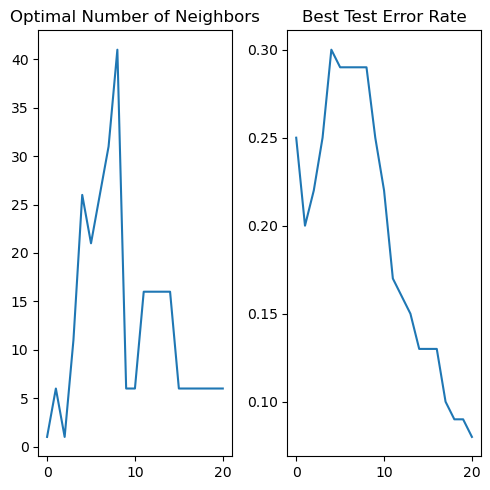

In [137]:
fig, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

ax[0].plot(optimal_ks)
ax[1].plot(best_test_err_rate)
_ = ax[0].set_title("Optimal Number of Neighbors")
_ = ax[1].set_title("Best Test Error Rate")

In [138]:
# 1di
mink_errors = []
manh_errors = []
cheb_errors = []

range_196 = range(1, 200, 5)

# Minkowski Distance
for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mink_err = mean_squared_error(y_test, y_pred)
    mink_errors.append(mink_err)

# Manhattan Distance
for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    manh_err = mean_squared_error(y_test, y_pred)
    manh_errors.append(manh_err)

# Chebyshev Distance
for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric='chebyshev')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cheb_err = mean_squared_error(y_test, y_pred)
    cheb_errors.append(cheb_err)

error_df = pd.DataFrame({'n_neighbors': range_196, 'euc_errors': test_errors[0:40],
                         'mink_errors': mink_errors, 'manh_errors': manh_errors, "cheb_errors": cheb_errors})

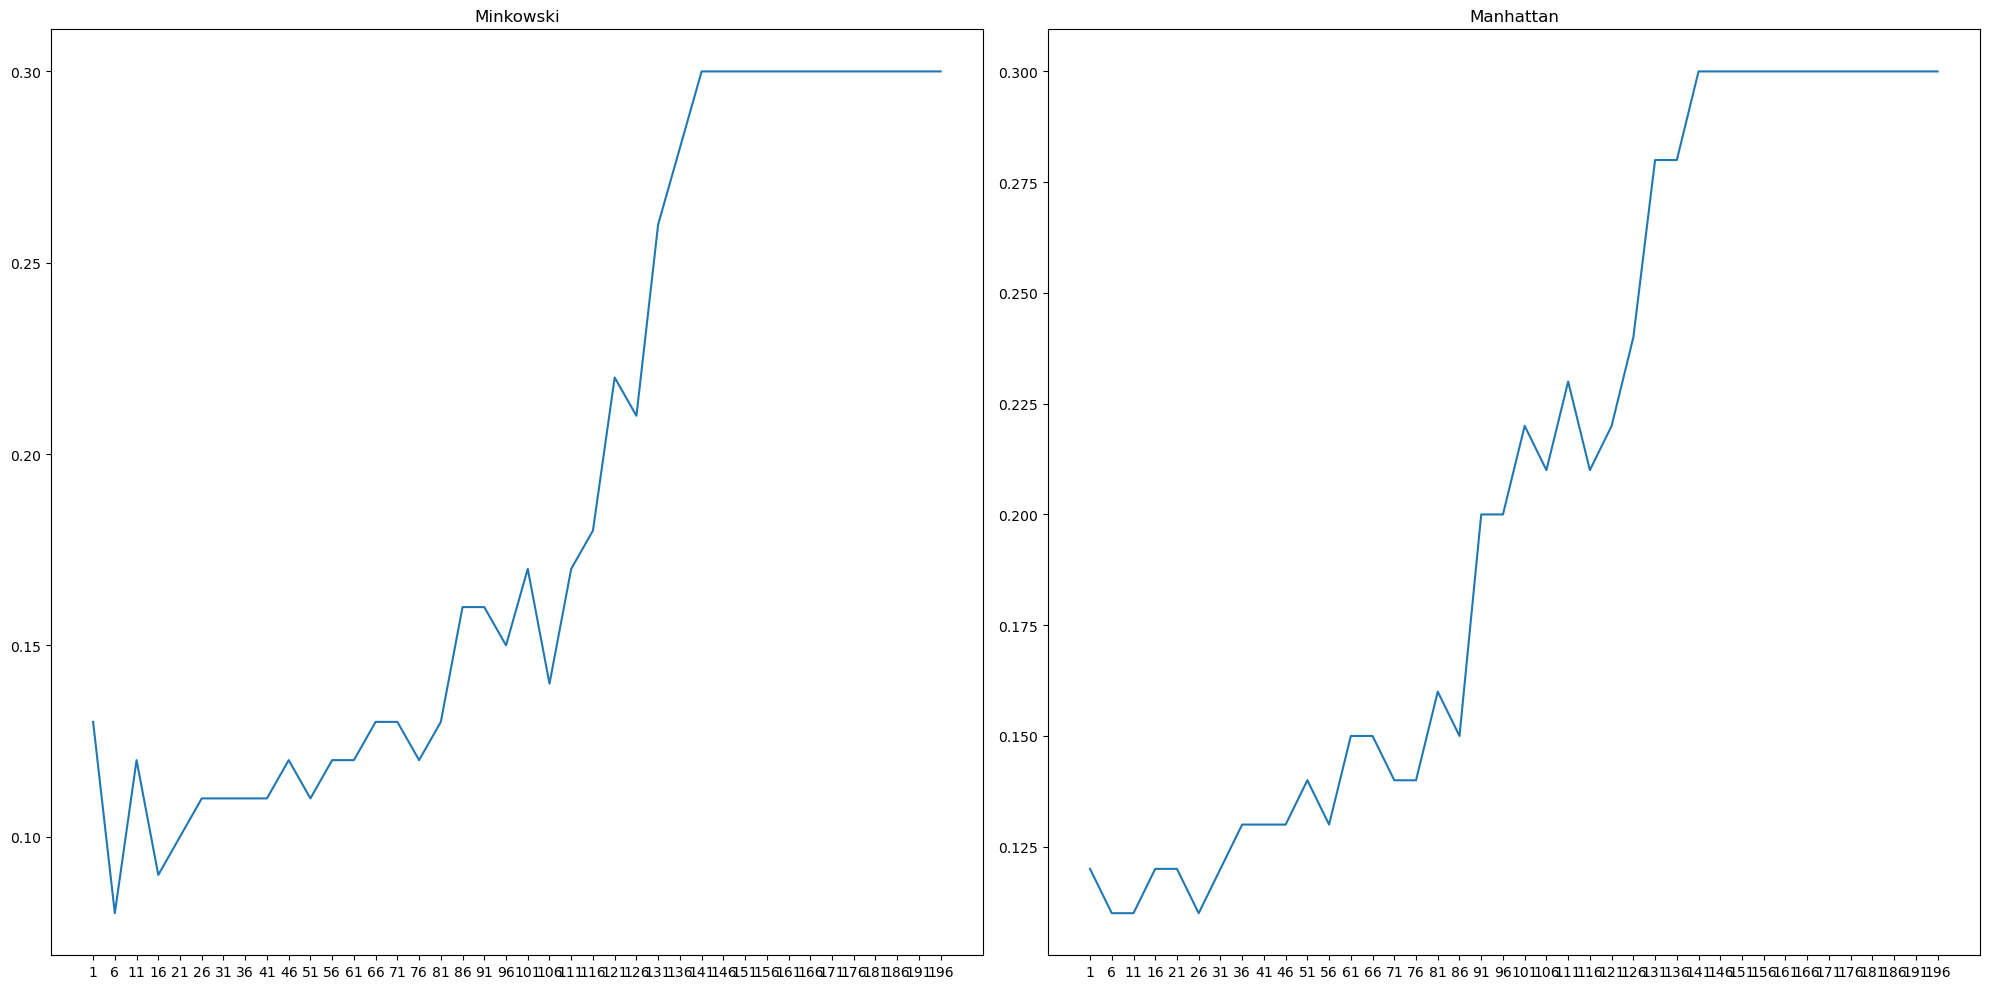

In [139]:
fig, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True

ax[0].plot(range_196, error_df['mink_errors'])
ax[1].plot(range_196, error_df['manh_errors'])
_ = ax[0].set_title("Minkowski")
_ = ax[1].set_title("Manhattan")
_ = ax[0].set_xticks(range_196)
_ = ax[1].set_xticks(range_196)


In [140]:
manh_best_k = 11
log_errors = []

for i in range(1, 11, 1):
    i = i/10
    model = KNeighborsClassifier(n_neighbors=manh_best_k, metric='minkowski', p=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    log_err = mean_squared_error(y_test, y_pred)
    log_errors.append(log_err)

c:\Users\mmoln\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\mmoln\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\mmoln\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\mmoln\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
c:\Users\mmoln\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py:654: UserWarning: Mind that fo

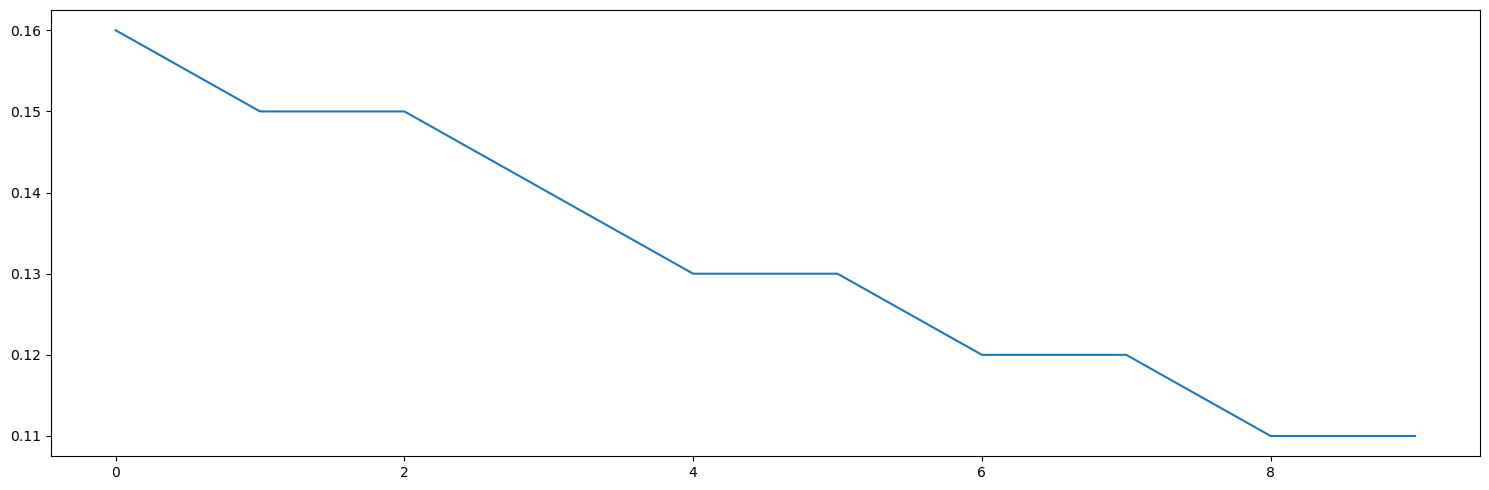

In [141]:
plt.rcParams["figure.figsize"] = [15, 5]

plt.plot(log_errors)

# The best log_10(p) is 0.9 and 1

In [143]:
# Mahalanobis Distance: Must provide either V or VI for Mahalanobis distance

V = X_train.cov().values # covariance matrix
VI = np.linalg.inv(V) # inverse cov. matrix
maha_errors = []

# Have to define the metric prior
def maha_metric(x, y):
    return mahalanobis(x, y, VI)

for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric=maha_metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    maha_err = mean_squared_error(y_test, y_pred)
    maha_errors.append(maha_err)

error_df['maha_errors'] = maha_errors

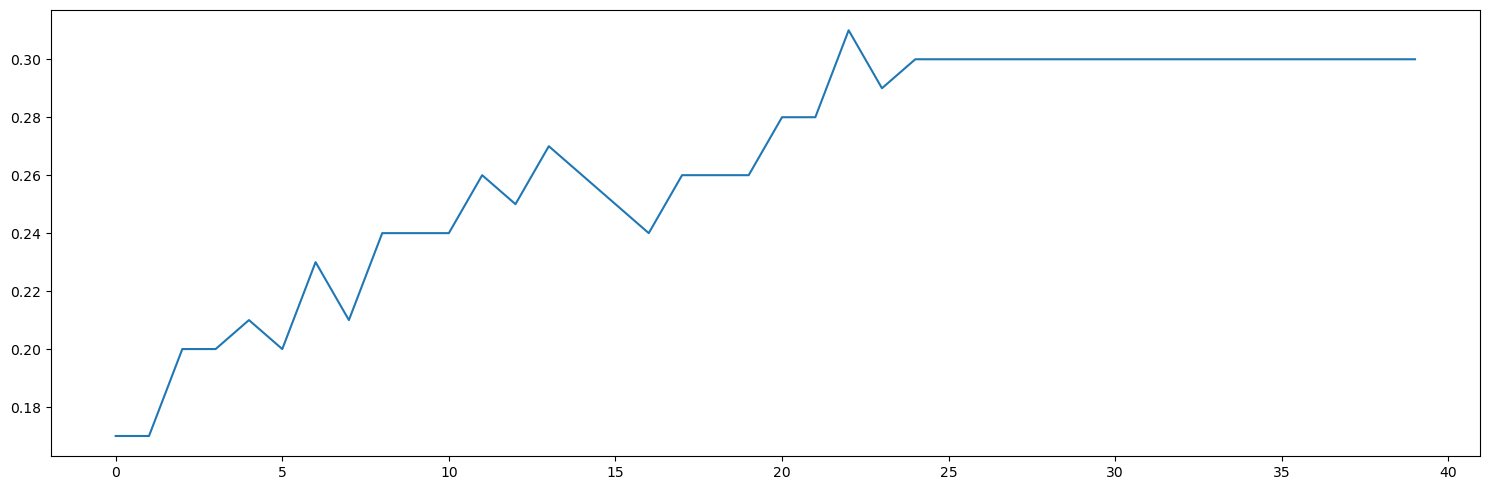

In [144]:
plt.rcParams["figure.figsize"] = [15, 5]

plt.plot(maha_errors)

In [145]:
euc_weighted_errors = []
manh_weighted_errors = []
cheb_weighted_errors = []

# Euclidean Weighted Distance
for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='distance')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    euc_err = mean_squared_error(y_test, y_pred)
    euc_weighted_errors.append(euc_err)

# Manhattan Weighted Distance
for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=1, weights='distance')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    manh_err = mean_squared_error(y_test, y_pred)
    manh_weighted_errors.append(manh_err)

# Chebyshev Weighted Distance
for i in range_196:
    model = KNeighborsClassifier(n_neighbors=i, metric='chebyshev', weights='distance')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cheb_err = mean_squared_error(y_test, y_pred)
    cheb_weighted_errors.append(cheb_err)

error_df['euc_weighted_errors'] = euc_weighted_errors
error_df['manh_weighted_errors'] = manh_weighted_errors
error_df['cheb_weighted_errors'] = cheb_weighted_errors

Best test error for maha_errors : 0.17
Best test error for euc_weighted_errors : 0.1
Best test error for manh_weighted_errors : 0.1


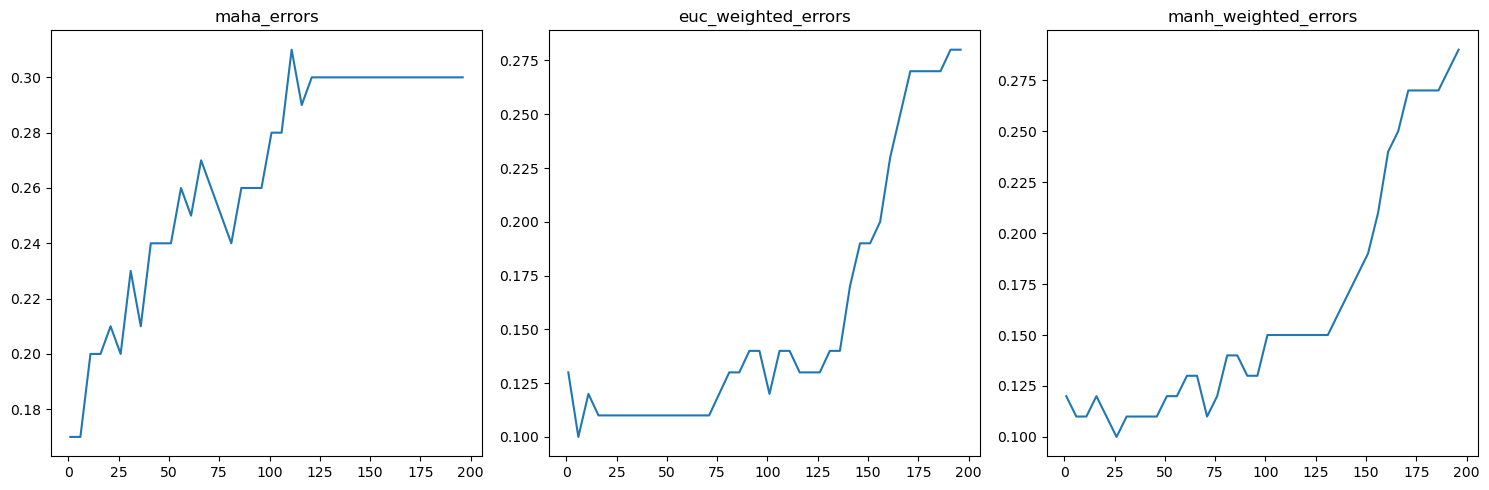

In [146]:
fig, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

for i in range(3):
    ax[i].plot(range_196, error_df.iloc[:, 5+i])
    _ = ax[i].set_title(error_df.columns[5+i])
    print("Best test error for", error_df.columns[i+5], ":", error_df.iloc[:, 5+i].min())

In [148]:
minimums = []
best_ks = []

for i in range(1, 9):
    col = error_df.columns[i]
    min = error_df[error_df[col] == error_df[col].min()][col].iloc[0]
    min_best_k = error_df[error_df[col] == error_df[col].min()]['n_neighbors'].iloc[0]
    minimums.append(min)
    best_ks.append(min_best_k)

lowest_errs_df = pd.DataFrame({"metric": error_df.columns[1:], "best_error": minimums, "best_k": best_ks}).sort_values(by='best_error')

In [149]:
lowest_errs_df

,metric,best_error,best_k
0,euc_errors,0.06,6
1,mink_errors,0.08,6
3,cheb_errors,0.08,16
5,euc_weighted_errors,0.10,6
6,manh_weighted_errors,0.10,26
2,manh_errors,0.11,6
7,cheb_weighted_errors,0.11,16
4,maha_errors,0.17,1
